In [1]:
import cnn
from cnn import layers
from cnn import activations

In [2]:
model = cnn.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation=activations.ReLU, input_shape=(32, 32, 3)))
model.add(layers.Pooling(pool_mode="max", pool_size=(3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation=activations.ReLU))
model.add(layers.Pooling(pool_mode="max", pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=activations.ReLU))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation=activations.ReLU))
model.add(layers.Dense(10, activation=activations.Softmax))

model.summary()


Model: Sequential
Layer (type)                       Output Shape                       Param #       
conv2d_1 (Conv2D)                  (None, 30, 30, 32)                 896              
--------------------------------------------------------------------------------
pooling_1 (Pooling)                (None, 10, 10, 32)                 0                
--------------------------------------------------------------------------------
conv2d_2 (Conv2D)                  (None, 8, 8, 64)                   18496            
--------------------------------------------------------------------------------
pooling_2 (Pooling)                (None, 4, 4, 64)                   0                
--------------------------------------------------------------------------------
conv2d_3 (Conv2D)                  (None, 2, 2, 64)                   36928            
--------------------------------------------------------------------------------
flatten_1 (Flatten)                (None, 256)     

In [3]:
x = [
        [
                [4, 1, 3, 5, 3],
                [2, 1, 1, 2, 2],
                [5, 5, 1, 2, 3],
                [2, 2, 4, 3, 2],
                [5, 1, 3, 4, 5]
        ],
]

w = [
        [
                [1, 2, 3],
                [4, 7, 5],
                [3, -32, 25]
        ],
        [
                [12, 18, 12],
                [18, -74, 45],
                [-92, 45, -18]
        ] 
]

conv2d = layers.Conv2D(2, (3, 3), activation=activations.ReLU, input_shape=(5, 5, 1))

conv2d.weights = w

conv2d.forward_propagation(x)

x = conv2d.neurons

pooling = layers.Pooling(pool_mode="max", pool_size=(3, 3), pool_strides=(1, 1))

pooling.pooling(x)

flatten = layers.Flatten()

flatten.flattening(pooling.neurons)

dw1 = [
    [0, 1, 3],
    [0, 2, -4]
]

dense_1 = layers.Dense(2, activation=activations.ReLU)

dense_1.weights = dw1

dense_1.forward_propagation([0] + flatten.neurons)

dense_2 = layers.Dense(10, activation=activations.Softmax)

dw2 = [
    [0, 0.09, 0.02],
    [0, 0.08, 0.03],
    [0, 0.07, 0.03],
    [0, 0.06, 0.02],
    [0, 0.05, 0.01],
    [0, 0.04, 0.02],
    [0, 0.03, 0.07],
    [0, 0.04, 0.08],
    [0, 0.05, 0.05],
    [0, 0.01, 0.01],
]

dense_2.weights = dw2

dense_2.forward_propagation([0] + dense_1.neurons)

Before Convo
1
5
5
Before Convolution
5
5
5
Convo Res
2
Convo Res
3
Convo Res
3
2
3
3
Convo
None
2
Before Pooling
2
3
3
2
1
1
Pooling
2
2
1
1
Flatten
2
3
[0, 121, 105]
3
[0, 436, 0]


In [4]:
from keras.datasets import mnist

Print Sample:


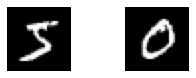

In [5]:
import numpy as np
import matplotlib.pyplot as plt

img_rows, img_cols = 28, 28

(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = np.array(X_train[:2])

X_train = np.pad(X_train, ((0,0),(2,2),(2,2)), 'constant').tolist()


for i in range(2):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')

print("Print Sample:")
plt.show()

In [6]:
lenet5 = cnn.Sequential()

lenet5.add(layers.Conv2D(6, (5, 5), activation=activations.ReLU, input_shape=(32, 32, 1)))
lenet5.add(layers.Pooling(pool_mode="average"))
lenet5.add(layers.Conv2D(16, (3, 3), activation=activations.ReLU))
lenet5.add(layers.Pooling(pool_mode="average"))
lenet5.add(layers.Flatten())
lenet5.add(layers.Dense(120, activation=activations.ReLU))
lenet5.add(layers.Dense(84, activation=activations.ReLU))     
lenet5.add(layers.Dense(10, activation=activations.ReLU))

lenet5.summary()


Model: Sequential
Layer (type)                       Output Shape                       Param #       
conv2d_1 (Conv2D)                  (None, 28, 28, 6)                  156              
--------------------------------------------------------------------------------
pooling_1 (Pooling)                (None, 14, 14, 6)                  0                
--------------------------------------------------------------------------------
conv2d_2 (Conv2D)                  (None, 12, 12, 16)                 880              
--------------------------------------------------------------------------------
pooling_2 (Pooling)                (None, 6, 6, 16)                   0                
--------------------------------------------------------------------------------
flatten_1 (Flatten)                (None, 576)                        0                
--------------------------------------------------------------------------------
dense_1 (Dense)                    (None, 120)     

In [7]:
X_train = list(map(lambda x: [x], X_train))
lenet5.fit(X_train, y_train)

Before Convo
1
32
32
Before Convolution
32
32
32
Convo Res
6
Convo Res
28
Convo Res
28
Convo Res
28
Convo Res
28
Convo Res
28
Convo Res
28
6
28
28
Convo
(None, 28, 28, 6)
6
Before Pooling
6
28
28
6
14
14
Pooling
6
Before Convo
6
14
14
Before Convolution
14
14
14
Convo Res
16
Before Convolution
14
14
14
Convo Res
16
Before Convolution
14
14
14
Convo Res
16
Before Convolution
14
14
14
Convo Res
16
Before Convolution
14
14
14
Convo Res
16
Before Convolution
14
14
14
Convo Res
16
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12
Convo Res
12

ValueError: shapes (120,577) and (3457,1) not aligned: 577 (dim 1) != 3457 (dim 0)